Christopher Evans

Tensorflow Sixth Codelab

https://codelabs.developers.google.com/codelabs/tensorflow-lab6-largecnns/index.html?index=..%2F..index#0

In [2]:
# Importing the neccessary libraries
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [5]:
# Downloading the data
import wget

link = "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip"
wget.download(link, "/tmp/cats-and-dogs.zip")

'/tmp/cats-and-dogs (1).zip'

In [6]:
#Extracting the files
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Getting the number of items
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

12501
12501


In [9]:
# Creating the file system for the data
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

# This will split the data
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring")
            
    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]
    
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)
        
    for filename in testing_set:
        this_files = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)
        
# This will point to the components fo the project
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

# The commands will start the process
split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size) 

666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


In [10]:
# This will determine if the data is properly unpacked
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [16]:
# This model will ahve convolution layers with max pooling
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
]) 

# This will compile the model
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
# This will train the model
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale= 1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, batch_size=100, class_mode='binary', target_size=(150,150))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, batch_size=100, class_mode='binary', target_size=(150,150))

Found 22499 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [20]:
# This will test the model
history = model.fit_generator(train_generator, epochs=15, verbose=1, validation_data=validation_generator)

Epoch 1/15
 97/225 [===========>..................] - ETA: 1:57 - loss: 0.7273 - acc: 0.5743

F:\Anaconda\envs\gotta_learn\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
F:\Anaconda\envs\gotta_learn\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
F:\Anaconda\envs\gotta_learn\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
F:\Anaconda\envs\gotta_learn\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
F:\Anaconda\envs\gotta_learn\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF d

225/225 [==============================] - 220s 979ms/step - loss: 0.6478 - acc: 0.6367 - val_loss: 0.2507 - val_acc: 1.0000
Epoch 2/15
225/225 [==============================] - 277s 1s/step - loss: 0.5105 - acc: 0.7485 - val_loss: 0.1985 - val_acc: 1.0000
Epoch 3/15
225/225 [==============================] - 293s 1s/step - loss: 0.4424 - acc: 0.7923 - val_loss: 0.3190 - val_acc: 1.0000
Epoch 4/15
225/225 [==============================] - 302s 1s/step - loss: 0.3859 - acc: 0.8227 - val_loss: 0.0815 - val_acc: 1.0000
Epoch 5/15
225/225 [==============================] - 310s 1s/step - loss: 0.3326 - acc: 0.8518 - val_loss: 0.1993 - val_acc: 1.0000
Epoch 6/15
225/225 [==============================] - 285s 1s/step - loss: 0.2747 - acc: 0.8811 - val_loss: 0.1558 - val_acc: 1.0000
Epoch 7/15
225/225 [==============================] - 304s 1s/step - loss: 0.2148 - acc: 0.9117 - val_loss: 0.0707 - val_acc: 1.0000
Epoch 8/15
225/225 [==============================] - 299s 1s/step - loss: 0.

<Figure size 432x288 with 0 Axes>

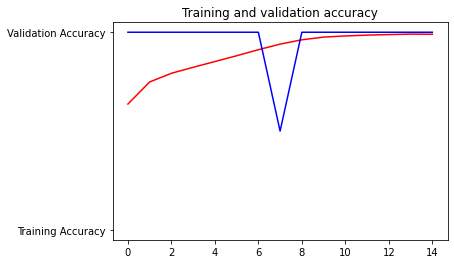

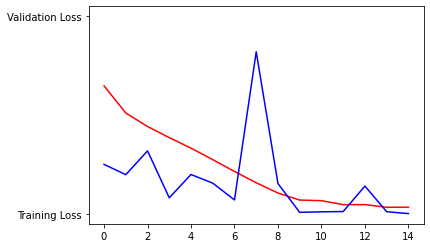

<Figure size 432x288 with 0 Axes>

In [24]:
# Getting the libraries needed for getting the training results
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Gets a list of lsit resluts for each epoch
acc = history.history['acc']
val_acc=history.history['val_acc']
loss = history.history['loss']
val_loss=history.history['val_loss']

epochs = range(len(acc)) 

# Plotting accuracy per epoch
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

In [26]:
# This will test the model, but again this only works with UNIX
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " is a dog")
    else:
        print(fn + " is a cat")

ModuleNotFoundError: No module named 'termios'